In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ushape.csv')

In [ ]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
df['X']=df['3.159499363321345566e-02']
df['Y']=df['9.869877579082642072e-01']
df['class']=df['0.000000000000000000e+00']

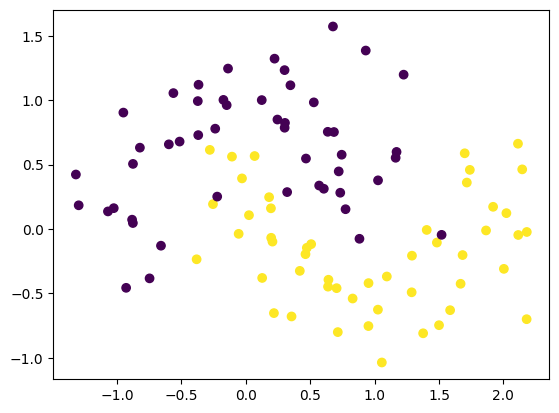

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#Xavier/Glorat uses tanh/sigmoid not relu

In [ ]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[ 0.56909317,  0.6237256 , -0.24302766, -0.32761165, -0.6261848 ,
         -0.68905395,  0.2633915 ,  0.6155618 ,  0.48412603, -0.6081202 ],
        [ 0.13414568, -0.40178454, -0.28954446, -0.04558098,  0.57200223,
         -0.10173792, -0.45479906, -0.44869164,  0.51244766,  0.2851057 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 4.14943814e-01, -8.67705047e-02,  1.59637272e-01,
         -4.73626733e-01, -2.65197754e-01,  1.76167011e-01,
         -4.46703821e-01, -7.77674317e-02,  2.29201376e-01,
          1.75136924e-01],
        [ 1.02816403e-01,  1.53722703e-01,  6.79467320e-02,
          1.89505041e-01, -5.28673172e-01, -2.53897518e-01,
         -3.64486217e-01,  3.95193279e-01,  2.23656237e-01,
         -3.74425352e-01],
        [ 5.86500168e-02,  3.49170268e-01,  4.19073880e-01,
          1.27718508e-01,  9.94812250e-02,  3.66375685e-01,
         -3.55920345e-01,  3.33684087e-01, -3.60146761e-02,
         -2.8553357

In [ ]:
initial_weights = model.get_weights()

#Xavier/Glorat weight initilization implementation technique.


In [ ]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[-0.5489839 , -0.48228422,  0.06497708, -1.1764058 , -0.9323316 ,
         -0.64006037, -1.4498831 , -0.11180546, -0.83230495,  0.45149052],
        [-0.215587  , -0.4286999 , -0.06102637,  0.46118563,  0.28055662,
          1.0395206 , -0.07937493,  1.9321434 , -0.5339413 ,  0.13305315]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 2.84982413e-01,  9.79761705e-02, -7.97669947e-01,
         -2.71537036e-01, -1.00144401e-01, -2.34410405e-01,
         -5.00122488e-01, -1.70233086e-01, -1.63923353e-01,
          9.79738683e-02],
        [-3.95315140e-01, -4.46401387e-02,  5.00432514e-02,
          4.82403547e-01,  5.49075603e-01,  2.41850793e-01,
         -9.66077596e-02, -2.55026162e-01, -1.51534677e-01,
          6.15472436e-01],
        [ 1.06935300e-01, -2.29743600e-01,  7.05489516e-01,
          3.09068263e-01, -4.15497690e-01, -2.17424378e-01,
         -2.05914780e-01,  4.19816941e-01,  2.03123957e-01,
         -4.4223031

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.7060 - loss: 0.6089 - val_accuracy: 0.8500 - val_loss: 0.5460
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7084 - loss: 0.6039 - val_accuracy: 0.8500 - val_loss: 0.5327
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7201 - loss: 0.5862 - val_accuracy: 0.8500 - val_loss: 0.5196
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7084 - loss: 0.5832 - val_accuracy: 0.8500 - val_loss: 0.5072
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7006 - loss: 0.5758 - val_accuracy: 0.8500 - val_loss: 0.4951
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7601 - loss: 0.5526 - val_accuracy: 0.8500 - val_loss: 0.4834
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7406 - loss: 0.5589 - val_accuracy: 0.8500 - val_loss: 0.4728
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7821 - loss: 0.5266 - val_accuracy: 0.8500 - val_loss

In [ ]:
model.get_weights()

[array([[-0.44779462, -0.44969985,  0.04100377, -1.0023783 , -0.78850925,
         -0.56013775, -1.6410758 , -0.13610089, -0.99879956,  0.41169715],
        [-0.1625454 , -0.49879572, -0.10682516,  0.508634  ,  0.3322408 ,
          1.0957533 , -0.04068023,  1.881598  , -0.5558381 ,  0.07434845]],
       dtype=float32),
 array([ 0.00995904,  0.07745726, -0.05068701, -0.0599749 , -0.01622641,
         0.05418722,  0.28076082,  0.00883437,  0.18919295, -0.00199376],
       dtype=float32),
 array([[ 0.2669297 ,  0.08015098, -0.7231325 , -0.26530045, -0.12273096,
         -0.16554241, -0.42458895, -0.12143619, -0.07357187,  0.0628035 ],
        [-0.4381738 , -0.05396036,  0.1182682 ,  0.522325  ,  0.50819045,
          0.31978285, -0.02842785, -0.2027739 , -0.06333119,  0.63470185],
        [ 0.01844636, -0.20621262,  0.69828   ,  0.3956611 , -0.5053286 ,
         -0.12562785, -0.18674007,  0.49760085,  0.1649876 , -0.3683346 ],
        [ 0.15544848,  0.12538645,  0.4089955 , -0.08343249, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

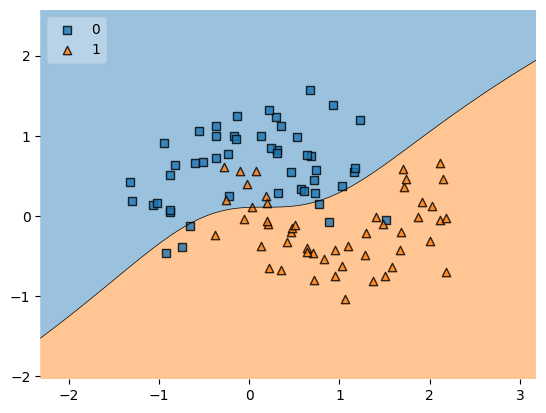

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [ ]:
(np.random.randn(10,10)*0.01).min()

-0.01827357681213676

In [ ]:
(np.random.randn(10,10)*0.01).max()

0.024869920212470503